In [1]:

######################################
# Importando as libraries
######################################
 
import pandas as pd
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler 

In [2]:
######################################
# Importa o dataset
######################################
 
# Importando os DataFrames

# England Premier League
#df = pd.read_excel('https://www.football-data.co.uk/new/BRA.xlsx')

# Baixando a Planilha do Site Football Data
ENG1_01 = pd.read_csv("https://www.football-data.co.uk/mmz4281/1617/D1.csv")
ENG1_02 = pd.read_csv("https://www.football-data.co.uk/mmz4281/1718/D1.csv")
ENG1_03 = pd.read_csv("https://www.football-data.co.uk/mmz4281/1819/D1.csv")
ENG1_04 = pd.read_csv("https://www.football-data.co.uk/mmz4281/1920/D1.csv")
ENG1_05 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2021/D1.csv")
ENG1 = [ENG1_01,ENG1_02,ENG1_03,ENG1_04,ENG1_05]
df1 = pd.concat(ENG1)
df1 = df1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','B365H','B365D','B365A']]
df1 = df1.dropna()

df2 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2122/D1.csv")
df2 = df2[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','B365H','B365D','B365A']]
df2 = df2.dropna()



In [3]:
df1

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A
0,Bayern Munich,Werder Bremen,6,0,H,1.10,10.00,23.00
1,Augsburg,Wolfsburg,0,2,A,2.80,3.25,2.60
2,Dortmund,Mainz,2,1,H,1.36,5.00,8.50
3,Ein Frankfurt,Schalke 04,1,0,H,3.40,3.30,2.20
4,FC Koln,Darmstadt,2,0,H,1.80,3.50,4.75
...,...,...,...,...,...,...,...,...
301,Hoffenheim,Hertha,2,1,H,1.90,3.80,3.80
302,Stuttgart,Bielefeld,0,2,A,2.37,3.75,2.75
303,Union Berlin,RB Leipzig,2,1,H,3.00,3.75,2.20
304,Werder Bremen,M'gladbach,2,4,A,2.70,4.00,2.37


In [4]:
df2

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A
0,M'gladbach,Bayern Munich,1,1,D,4.33,4.50,1.66
1,Augsburg,Hoffenheim,0,4,A,3.20,3.75,2.10
2,Bielefeld,Freiburg,0,0,D,2.80,3.40,2.50
3,Stuttgart,Greuther Furth,5,1,H,1.83,4.00,4.00
4,Union Berlin,Leverkusen,1,1,D,2.75,3.40,2.55
...,...,...,...,...,...,...,...,...
301,Mainz,Ein Frankfurt,2,2,D,1.70,4.33,4.33
302,M'gladbach,Hoffenheim,5,1,H,2.00,4.33,3.10
303,Stuttgart,FC Koln,2,1,H,2.20,4.00,2.87
304,Union Berlin,Bochum,3,2,H,1.40,5.00,7.00


In [5]:
# Criando a Coluna de 0 e 1 para análise do Modelo de Machine Learning
df1.loc[(df1['FTHG'] > df1['FTAG']), 'BackHome'] = 1
df1.loc[(df1['FTHG'] <= df1['FTAG']), 'BackHome'] = 0

# Criando a Coluna de 0 e 1 para análise do Modelo de Machine Learning
df2.loc[(df2['FTHG'] > df2['FTAG']), 'BackHome'] = 1
df2.loc[(df2['FTHG'] <= df2['FTAG']), 'BackHome'] = 0

In [6]:
df1 = df1[['B365H','B365D','B365A','BackHome']]
df2 = df2[['B365H','B365D','B365A','BackHome']]

In [7]:
#x1 = df1.iloc[:, :].values
#y1 = df1.iloc[:, -1].values

######################################
# Separar dados em Treino e Teste
######################################
 
#x1_train, x1_test, y1_train, y1_test = ms.train_test_split(x1, y1, test_size = 0.3, random_state = 0)

#df1 = pd.DataFrame(x1_test)
#df1.columns = ['Home','Away','HG','AG','Res','PH','PD','PA','BackHome']


In [8]:
x1_train = df1.iloc[:, :-1].values
y1_train = df1.iloc[:, -1].values

x2_test = df2.iloc[:, :-1].values
y2_test = df2.iloc[:, -1].values

######################################
# Separar dados em Treino e Teste
######################################

#x2_train, x2_test, y2_train, y2_test = ms.train_test_split(x2, y2, test_size = 0.3, random_state = 0)

In [9]:
x1_train

array([[ 1.1 , 10.  , 23.  ],
       [ 2.8 ,  3.25,  2.6 ],
       [ 1.36,  5.  ,  8.5 ],
       ...,
       [ 3.  ,  3.75,  2.2 ],
       [ 2.7 ,  4.  ,  2.37],
       [ 1.6 ,  4.2 ,  5.25]])

In [10]:
y1_train

array([1., 0., 1., ..., 1., 0., 0.])

In [11]:
x2_test

array([[ 4.33,  4.5 ,  1.66],
       [ 3.2 ,  3.75,  2.1 ],
       [ 2.8 ,  3.4 ,  2.5 ],
       [ 1.83,  4.  ,  4.  ],
       [ 2.75,  3.4 ,  2.55],
       [ 1.53,  4.5 ,  5.75],
       [ 1.4 ,  5.5 ,  6.5 ],
       [ 8.  ,  5.5 ,  1.33],
       [ 2.55,  3.4 ,  2.75],
       [ 1.36,  5.25,  7.  ],
       [ 2.62,  3.5 ,  2.62],
       [ 1.57,  4.5 ,  5.25],
       [ 5.5 ,  4.75,  1.5 ],
       [ 2.55,  3.4 ,  2.7 ],
       [ 3.  ,  3.4 ,  2.37],
       [ 2.2 ,  3.75,  3.  ],
       [ 2.  ,  3.6 ,  3.6 ],
       [ 1.11, 11.  , 16.  ],
       [ 1.4 ,  5.5 ,  6.5 ],
       [ 4.75,  3.8 ,  1.72],
       [ 3.3 ,  3.6 ,  2.1 ],
       [ 1.83,  3.75,  4.2 ],
       [ 1.66,  4.  ,  5.  ],
       [ 2.15,  3.6 ,  3.2 ],
       [ 1.14,  9.  , 15.  ],
       [ 2.45,  3.25,  2.9 ],
       [ 3.6 ,  3.5 ,  2.05],
       [ 2.2 ,  3.6 ,  3.1 ],
       [ 5.5 ,  4.33,  1.57],
       [ 2.  ,  3.75,  3.5 ],
       [ 3.1 ,  3.8 ,  2.15],
       [ 1.7 ,  3.75,  5.  ],
       [ 3.  ,  3.8 ,  2.2 ],
       [ 2

In [12]:
y2_test

array([0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0.

In [13]:
######################################
# Feature Scalling
######################################
sc_x1_train = StandardScaler()
sc_x2_test = StandardScaler()

x1_train = sc_x1_train.fit_transform(x1_train)
x2_test = sc_x2_test.fit_transform(x2_test)
 

In [14]:
######################################
# Treinando o modelo
######################################
 
classifier = SVC(kernel='rbf')
classifier.fit(x1_train, y1_train)
 

SVC()

In [15]:

######################################
# Previsao
######################################
 
y2_pred = classifier.predict(x2_test)
y2_result = np.concatenate((y2_pred.reshape(len(y2_pred),1), y2_test.reshape(len(y2_test),1)),1)

In [16]:
#y_pred_prob = classifier.predict_proba(X_test)
#y_pred_prob = y_pred_prob[:,1]
#y_result_prob = np.concatenate((y_pred.reshape(len(y_pred),1), y_pred_prob.reshape(len(y_pred_prob),1)),1)
 
######################################
# Matrix de confusao
######################################
 
cm = confusion_matrix(y2_test, y2_pred)
print(cm)
print(accuracy_score(y2_test, y2_pred))



[[139  24]
 [ 75  68]]
0.6764705882352942


In [17]:
######################################
# Valor Especifico
######################################
 
# print(classifier.predict([[1,30,4,0,0,0,0,0,0,195,130,70,80,20,56]]))
df2["Previsões"] = y2_pred
#df2["BackHome"] = y2_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
df2

,B365H,B365D,B365A,BackHome,Previsões
0,4.33,4.50,1.66,0.0,0.0
1,3.20,3.75,2.10,0.0,0.0
2,2.80,3.40,2.50,0.0,0.0
3,1.83,4.00,4.00,1.0,0.0
4,2.75,3.40,2.55,0.0,0.0
...,...,...,...,...,...
301,1.70,4.33,4.33,0.0,1.0
302,2.00,4.33,3.10,1.0,0.0
303,2.20,4.00,2.87,1.0,0.0
304,1.40,5.00,7.00,1.0,1.0


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1681: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = empty_value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

Nº
92    3.26
Name: Profit_acu, dtype: float64

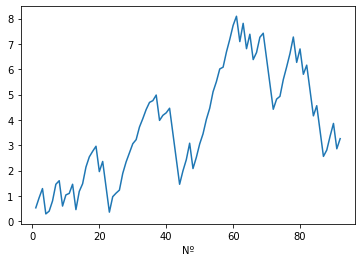

In [19]:
stake = 1
win_Back = stake * (df2.B365H - 1)
lose_Back = -stake

df2.loc[(df2['Previsões'] == 1) & (df2['BackHome'] == 1), 'Profit'] = win_Back
df2.loc[(df2['Previsões'] == 1) & (df2['BackHome'] == 0), 'Profit'] = lose_Back
df2.loc[(df2['Previsões'] == 0) & (df2['BackHome'] == 1), 'Profit'] = 0
df2.loc[(df2['Previsões'] == 0) & (df2['BackHome'] == 0), 'Profit'] = 0

filtro = df2.Previsões == 1
df0 = df2[filtro]

# Ajustando o Índice
df0.reset_index(inplace=True, drop=True)
df0.index = df0.index.set_names(['Nº'])
df0 = df0.rename(index=lambda x: x + 1)

df0['Profit_acu'] = df0.Profit.cumsum()
df0.Profit_acu.plot()
df0.Profit_acu.tail(1)

In [20]:
df0.head(20)

,B365H,B365D,B365A,BackHome,Previsões,Profit,Profit_acu
Nº,,,,,,,
1,1.53,4.50,5.75,1.0,1.0,0.53,0.53
2,1.40,5.50,6.50,1.0,1.0,0.40,0.93
3,1.36,5.25,7.00,1.0,1.0,0.36,1.29
4,1.57,4.50,5.25,0.0,1.0,-1.00,0.29
5,1.11,11.00,16.00,1.0,1.0,0.11,0.40
6,1.40,5.50,6.50,1.0,1.0,0.40,0.80
7,1.66,4.00,5.00,1.0,1.0,0.66,1.46
8,1.14,9.00,15.00,1.0,1.0,0.14,1.60
9,1.70,3.75,5.00,0.0,1.0,-1.00,0.60
